# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Importing the dataset

In [3]:
df = pd.read_csv("dataframe_.csv")

In [4]:
df.shape

(1697, 2)

# Exploratory Data Analysis

In [6]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [26]:
df.ndim

2

## Removing the null values and handling the outliers

In [27]:
df.isnull().sum()

input     1
output    1
dtype: int64

We can see that there are some missing values in **x1** and **x2** feature. So let's impute these missing values.

In [28]:
bool_series = pd.notnull(df)
bool_series

,input,output
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
1692,True,True
1693,True,True
1694,True,True
1695,True,True


In [7]:
df1 = df.fillna(df.median())
df1.isnull().sum()

input     0
output    0
dtype: int64

In [8]:
df1.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check if thers are any outliers using **boxplots**

<h2> OUTLIERS</h2>

<h3>1. Visualization</h3>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

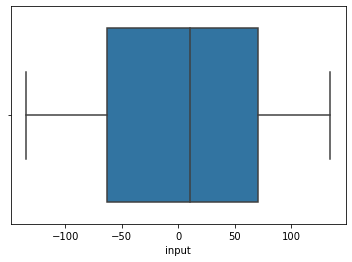

In [29]:
#using boxplot
sns.boxplot(df1['input'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

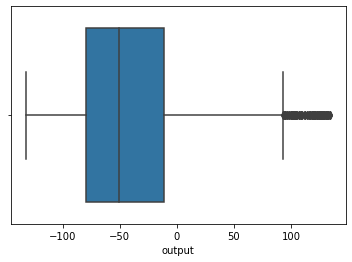

In [30]:
sns.boxplot(df1['output'])

Here we can see that there are outliers. So let us remove them.

In [31]:
df1['output'].quantile(0.999)

133.7931158

In [32]:
df2 = df1[df1['output'] <= 135]

In [33]:
df2.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check for outliers using boxplots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

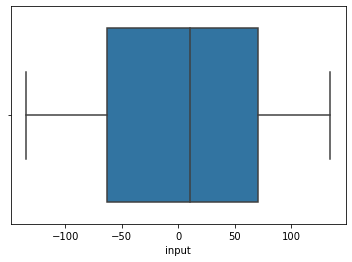

In [34]:
sns.boxplot(df2['input'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

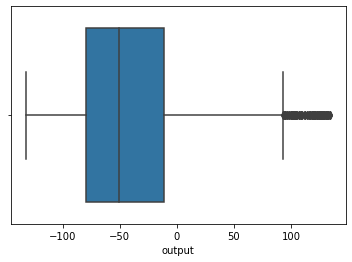

In [35]:
sns.boxplot(df2['output'])

we can see that there are no outliers in the data set

<AxesSubplot:xlabel='input', ylabel='output'>

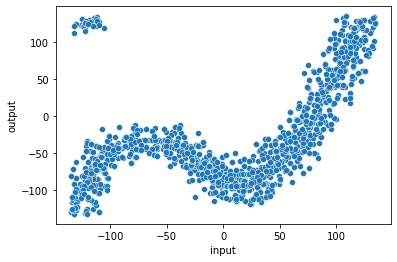

In [18]:
#using scatterplot

sns.scatterplot(x=df2['input'], y=df2['output'])

# Data preprocessing for Model training and evaluation

In [20]:
X = df2.drop(columns=['output'])
y = df2['output']

In [21]:
y.count

<bound method Series.count of 0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1692    -76.380902
1693    -82.796934
1694    -87.000000
1695   -104.943052
1696   -101.726894
Name: output, Length: 1697, dtype: float64>

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [23]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
 # Logistic Regression
# lg = LogisticRegression()
# lg.fit(X_train, y_train)
# score = lg.score(X_test, y_test)
# print(score)
# pred = lg.predict(X_test)
# print(classification_report(y_test,pred))


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

[0.40563606]
-34.85541363149856


,Coeff
input,0.405636


In [55]:
# support vector Machines with rbf kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
score2 = svc_rbf.score(X_test, y_test)
print(score2)
pred = svc_rbf.predict(X_test)
print(classification_report(y_test,pred))

0.9442176870748299
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       412
           1       0.98      0.89      0.93       323

    accuracy                           0.94       735
   macro avg       0.95      0.94      0.94       735
weighted avg       0.95      0.94      0.94       735



In [79]:
#Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,min_samples_split=30)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print(dt_score)
pred = dt.predict(X_test)
print(classification_report(y_test,pred))

0.9469387755102041
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       412
           1       0.95      0.93      0.94       323

    accuracy                           0.95       735
   macro avg       0.95      0.94      0.95       735
weighted avg       0.95      0.95      0.95       735



In [57]:
# K Nearest Neighbours

# n_neighbours = 5 gives the best result
knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

0.9537414965986395
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       412
           1       0.96      0.94      0.95       323

    accuracy                           0.95       735
   macro avg       0.95      0.95      0.95       735
weighted avg       0.95      0.95      0.95       735



## Evaluation
- Out of all the Five models, KNN scored the highest.